# Setup

## Import and check packages

In [1]:
import sys
import pandas as pd
import numpy as np
import nltk
import gensim
import sklearn
import re, string
from nltk.stem import PorterStemmer
import multiprocessing
import os
import csv
import matplotlib
import scipy

In [2]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, \
                                            CountVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [3]:
print('Version check:')
print('Python: {}'.format(sys.version))
print('pandas: {}'.format(pd.__version__))
print('nltk: {}'.format(nltk.__version__))
print('gensim: {}'.format(gensim.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('regex: {}'.format(re.__version__))
print('scipy: {}'.format(scipy.__version__))

Version check:
Python: 3.8.2 (tags/v3.8.2:7b3ab59, Feb 25 2020, 23:03:10) [MSC v.1916 64 bit (AMD64)]
pandas: 1.0.3
nltk: 3.5
gensim: 3.8.3
sklearn: 0.22.2.post1
regex: 2.2.1
scipy: 1.4.1


## Import data

In [4]:
# train_df = pd.read_pickle('data_files/train_df.pkl')
# train_df.head()

In [5]:
# test_df = pd.read_pickle('data_files/test_df.pkl')
# test_df.head()

In [6]:
df = pd.read_pickle('data_files/processed_data.pkl')
shuffled_df = df.sample(frac=1)
shuffled_df.head()

,,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating,review_word_count
2942,2169,on 06/06/06 12:44 PM (PDT),Great First Car,1999 Mercury Cougar Hatchback I4 2dr Coupe,I loved it while i had it,I recently just purchesed a new car so no lon...,3.75,359
4240,3043,on 04/28/02 00:00 AM (PDT),mykem1,2000 Mercury Sable Wagon GS 4dr Wagon,Don't waste your money,"After the first year, the car's mileage \nwor...",2.5,555
160,138,on 03/26/02 00:00 AM (PST),Erick,2002 Bentley Arnage Sedan Red Label 4dr Sedan ...,Very Very Nice,I have owned my Red Label for no more than a ...,4.875,285
1940,1163,on 01/23/08 10:05 AM (PST),cathy Bailey,1998 Isuzu Amigo SUV S V6 2dr SUV 4WD w/Soft Top,Best Car to Date,"At 185,000 miles This car has given me no pro...",4.375,279
178,135,on 03/06/17 04:19 AM (PST),RJN,2014 Maserati Quattroporte GTS GTS 4dr Sedan (...,Haven't lost yet!,"My GTS is fast, very fast. 0-60 is less than ...",5,773


In [7]:
shuffled_df.dtypes

                     object
Review_Date          object
Author_Name          object
Vehicle_Title        object
Review_Title         object
Review               object
Rating               object
review_word_count     int64
dtype: object

In [8]:
shuffled_df.Rating = shuffled_df.Rating.astype('float')

In [9]:
shuffled_df.dtypes

                      object
Review_Date           object
Author_Name           object
Vehicle_Title         object
Review_Title          object
Review                object
Rating               float64
review_word_count      int64
dtype: object

In [10]:
shuffled_df['rounded_rating'] = shuffled_df.Rating.round(0)

In [11]:
shuffled_df.head()

,,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating,review_word_count,rounded_rating
2942,2169,on 06/06/06 12:44 PM (PDT),Great First Car,1999 Mercury Cougar Hatchback I4 2dr Coupe,I loved it while i had it,I recently just purchesed a new car so no lon...,3.750,359,4.0
4240,3043,on 04/28/02 00:00 AM (PDT),mykem1,2000 Mercury Sable Wagon GS 4dr Wagon,Don't waste your money,"After the first year, the car's mileage \nwor...",2.500,555,2.0
160,138,on 03/26/02 00:00 AM (PST),Erick,2002 Bentley Arnage Sedan Red Label 4dr Sedan ...,Very Very Nice,I have owned my Red Label for no more than a ...,4.875,285,5.0
1940,1163,on 01/23/08 10:05 AM (PST),cathy Bailey,1998 Isuzu Amigo SUV S V6 2dr SUV 4WD w/Soft Top,Best Car to Date,"At 185,000 miles This car has given me no pro...",4.375,279,4.0
178,135,on 03/06/17 04:19 AM (PST),RJN,2014 Maserati Quattroporte GTS GTS 4dr Sedan (...,Haven't lost yet!,"My GTS is fast, very fast. 0-60 is less than ...",5.000,773,5.0


In [12]:
shuffled_df.columns

Index(['', 'Review_Date', 'Author_Name', 'Vehicle_Title', 'Review_Title',
       'Review', 'Rating', 'review_word_count', 'rounded_rating'],
      dtype='object')

In [13]:
shuffled_df.rounded_rating.value_counts()

5.0    2998
4.0    1746
3.0     376
2.0     211
1.0      48
Name: rounded_rating, dtype: int64

## EDA

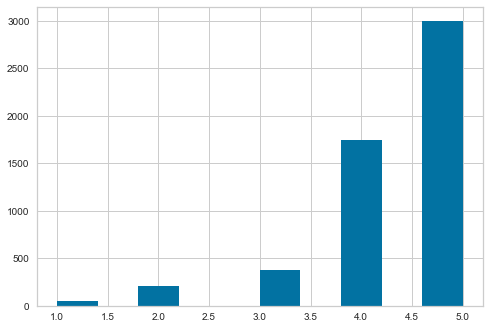

In [14]:
shuffled_df.rounded_rating.hist()

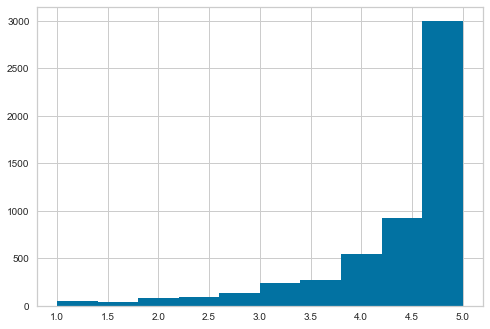

In [15]:
shuffled_df.Rating.hist()
plt.savefig('ratings_dist.png', format = 'png')

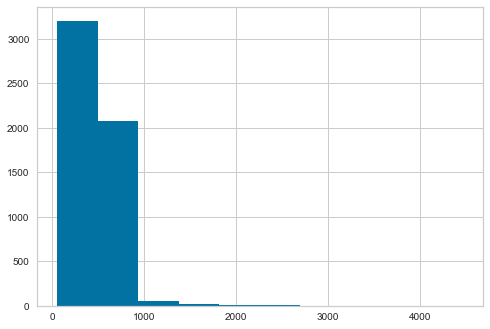

In [16]:
shuffled_df.review_word_count.hist()
plt.savefig('word_counts_dist.png', format='png')

In [17]:
shuffled_df.review_word_count.describe()

count    5379.000000
mean      445.171407
std       253.905435
min        50.000000
25%       267.000000
50%       417.000000
75%       625.000000
max      4467.000000
Name: review_word_count, dtype: float64

## Setup functions

In [18]:
def clean_doc(doc): 
    # split document into individual words
    tokens=doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # # filter out short tokens
    tokens = [word for word in tokens if len(word) > 4]
    # #lowercase all words
    tokens = [word.lower() for word in tokens]
    # # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]         
    # # word stemming Commented
    if STEMMING:
        ps=PorterStemmer()
        tokens=[ps.stem(word) for word in tokens]
    return tokens

## Analysis settings

In [19]:
n_dim = 100
n_grams = 1
random_seed = 88
cores = multiprocessing.cpu_count()
STEMMING = True

## Sample documents

In [20]:
shuffled_df = shuffled_df.iloc[:1800]

# Vectorize Data

## Prepare data

In [21]:
# train_docs = list()
# gensim_train = list()
# for i in range(len(train_df)):
#     temp_text = train_df['Review'].iloc[i]
#     cleaned_doc = clean_doc(temp_text)
#     gensim_train.append(cleaned_doc)
#     #print(temp_text)
#     combined_text = ' '.join(clean_doc(temp_text))
#     train_docs.append(combined_text)

In [22]:
# test_docs = list()
# gensim_test = list()
# for i in range(len(test_df)):
#     temp_text = train_df['Review'].iloc[i]
#     cleaned_doc = clean_doc(temp_text)
#     gensim_test.append(cleaned_doc)
#     #print(temp_text)
#     combined_text = ' '.join(clean_doc(temp_text))
#     test_docs.append(combined_text)

In [23]:
docs = list()
gensim_docs = list()

for i in range(len(shuffled_df)):
    temp_text = shuffled_df['Review'].iloc[i]
    cleaned_doc = clean_doc(temp_text)
    gensim_docs.append(cleaned_doc)
    #print(temp_text)
    combined_text = ' '.join(clean_doc(temp_text))
    docs.append(combined_text)

## CountVectorizer

In [24]:
count_vec = CountVectorizer(ngram_range=(1, 1), max_features=100)
count_matrix = count_vec.fit_transform(docs)

In [25]:
count_matrix[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [26]:
print(count_vec.get_feature_names()[:5])

['acceler', 'alway', 'anoth', 'around', 'averag']


## TF-IDF

In [27]:
tfidf_vec = TfidfVectorizer(ngram_range=(1, 1), max_features=100)
tfidf_matrix =tfidf_vec.fit_transform(docs)

In [28]:
tfidf_vec.get_feature_names()[:5]

['acceler', 'alway', 'anoth', 'around', 'averag']

In [29]:
tfidf_matrix.T[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [30]:
len(tfidf_vec.get_feature_names())

100

## Doc2Vec

In [31]:
train_corpus = [TaggedDocument(doc, [i]) for i, doc in enumerate(gensim_docs)]
cores = multiprocessing.cpu_count()

print("\nWorking on Doc2Vec vectorization, dimension 100")
model_100 = Doc2Vec(train_corpus, vector_size = 100, window = 4, 
	min_count = 1, workers = cores, epochs = 20)

model_100.train(train_corpus, total_examples = model_100.corpus_count, 
	epochs = model_100.epochs)  # build vectorization model on training set

# vectorization for the training set
doc2vec_100_vectors = np.zeros((len(gensim_docs), 100)) # initialize numpy array
for i in range(0, len(gensim_docs)):
    doc2vec_100_vectors[i,] = model_100.infer_vector(gensim_docs[i]).transpose()
print('\nTraining doc2vec_100_vectors.shape:', doc2vec_100_vectors.shape)
# print('doc2vec_100_vectors[:2]:', doc2vec_100_vectors[:2])

# vectorization for the test set
# doc2vec_100_vectors_test = np.zeros((len(gensim_test), 100)) # initialize numpy array
# for i in range(0, len(gensim_test)):
#     doc2vec_100_vectors_test[i,] = model_100.infer_vector(gensim_test[i]).transpose()
# print('\nTest doc2vec_100_vectors_test.shape:', doc2vec_100_vectors_test.shape)


Working on Doc2Vec vectorization, dimension 100

Training doc2vec_100_vectors.shape: (1800, 100)


In [32]:
type(doc2vec_100_vectors)

numpy.ndarray

# Clustering Analysis

## CountVectorizer

In [33]:
k=5 # for the number of stars given to each review
km = KMeans(n_clusters=k, random_state =random_seed)
km.fit(count_matrix)
clusters = km.labels_.tolist()

terms = count_vec.get_feature_names()
Dictionary={'Cluster':clusters, 'Text': docs, 'Rating' : shuffled_df.rounded_rating.iloc[:1800]}
frame=pd.DataFrame(Dictionary, columns=['Rating', 'Cluster','Text'])
frame['record']=1
frame.head(n=10)

,Rating,Cluster,Text,record
2942,4.0,0,recent purches longer great receiv year trade ...,1
4240,2.0,4,first mileag worsen still horribl today althou...,1
160,5.0,1,own label never driven saloon anywher qualiti ...,1
1940,4.0,4,mile given problem basic batteri chang origin ...,1
178,5.0,1,exceed three time look million turn head every...,1
1789,4.0,1,mileag satisfiedi chang bought load suvim plea...,1
3263,5.0,1,found maraud unsold dealer septemb bought stic...,1
503,5.0,1,bought vehicl own drive daili driver famili wo...,1
2123,4.0,1,marin month problem littl noisi acceler somewh...,1
1601,5.0,1,bought limit right outta school indestruct tra...,1


In [34]:
frame[frame.Cluster == 3].Rating.mean()

4.601063829787234

In [35]:
frame[frame.Cluster == 0].Rating.mean()

4.598915989159892

In [36]:
frame[frame.Cluster == 1].Rating.mean()

4.411320754716981

In [37]:
frame[frame.Cluster == 2].Rating.mean()

4.365591397849462

In [38]:
frame[frame.Cluster == 4].Rating.mean()

3.935114503816794

In [39]:
frame.groupby(['Cluster']).mean()

,Rating,record
Cluster,,
0,4.598916,1
1,4.411321,1
2,4.365591,1
3,4.601064,1
4,3.935115,1


In [40]:
frame.groupby(['Cluster']).mean().to_excel('countvec_cluster_means.xlsx')

In [41]:
print("Top terms per cluster:")
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

terms_dict=[]

#save the terms for each cluster and document to dictionaries.  To be used later
#for plotting output.

# dictionary to store terms and titles
cluster_terms={}
cluster_title={}

for i in range(k):
    print("Cluster %d:" % i),
    temp_terms=[]
    temp_titles=[]
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
        terms_dict.append(terms[ind])
        temp_terms.append(terms[ind])
    cluster_terms[i]=temp_terms

Top terms per cluster:
Cluster 0:
 great
 drive
 look
 comfort
 power
 mileag
 handl
 interior
 better
 vehicl
Cluster 1:
 drive
 comfort
 power
 handl
 problem
 bought
 engin
 look
 own
 better
Cluster 2:
 vehicl
 drive
 mile
 great
 mileag
 comfort
 problem
 year
 own
 would
Cluster 3:
 drive
 great
 mile
 comfort
 handl
 look
 perform
 vehicl
 year
 power
Cluster 4:
 mile
 problem
 replac
 bought
 still
 transmiss
 year
 would
 engin
 drive


In [42]:
pivot=pd.pivot_table(frame, values='record', index='Rating',
                     columns='Cluster', aggfunc=np.sum, fill_value=0)

pivot.head(n=25)

Cluster,0,1,2,3,4
Rating,,,,,
1.0,0,11,1,1,3
2.0,3,23,9,4,23
3.0,9,49,14,5,42
4.0,121,257,59,49,114
5.0,236,455,103,129,80


In [43]:
pivot.to_excel('countvec_pivot.xlsx')

## TF-IDF

In [44]:
###############################################################################
### K Means Clustering - TFIDF
###############################################################################
#### Note: Here we carry out a clustering of the documents
k=5
km = KMeans(n_clusters=k, random_state =random_seed)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

terms = tfidf_vec.get_feature_names()
Dictionary={'Cluster':clusters, 'Text': docs, 'Rating' : shuffled_df.rounded_rating.iloc[:1800]}
frame=pd.DataFrame(Dictionary, columns=['Rating', 'Cluster','Text'])
frame['record']=1
frame.head()

,Rating,Cluster,Text,record
2942,4.0,4,recent purches longer great receiv year trade ...,1
4240,2.0,0,first mileag worsen still horribl today althou...,1
160,5.0,1,own label never driven saloon anywher qualiti ...,1
1940,4.0,0,mile given problem basic batteri chang origin ...,1
178,5.0,2,exceed three time look million turn head every...,1


In [45]:
print("Top terms per cluster:")
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

terms_dict=[]

#save the terms for each cluster and document to dictionaries.  To be used later
#for plotting output.

# dictionary to store terms and titles
cluster_terms={}
cluster_title={}

for i in range(k):
    print("Cluster %d:" % i),
    temp_terms=[]
    temp_titles=[]
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
        terms_dict.append(terms[ind])
        temp_terms.append(terms[ind])
    cluster_terms[i]=temp_terms

Top terms per cluster:
Cluster 0:
 mile
 problem
 replac
 bought
 transmiss
 year
 still
 engin
 never
 dealer
Cluster 1:
 drive
 comfort
 handl
 realli
 mileag
 own
 littl
 look
 mile
 great
Cluster 2:
 comfort
 power
 handl
 better
 interior
 seat
 perform
 mercuri
 look
 own
Cluster 3:
 vehicl
 drive
 purchas
 comfort
 own
 mileag
 reliabl
 great
 mile
 look
Cluster 4:
 great
 look
 drive
 mileag
 comfort
 truck
 realli
 handl
 mile
 power


In [46]:
pivot=pd.pivot_table(frame, values='record', index='Rating',
                     columns='Cluster', aggfunc=np.sum, fill_value=0)

pivot.to_excel('tfidf_pivot.xlsx')
pivot

Cluster,0,1,2,3,4
Rating,,,,,
1.0,13,2,1,0,0
2.0,43,4,8,6,1
3.0,70,6,25,12,6
4.0,193,64,210,60,73
5.0,136,188,350,149,180


In [47]:
frame[frame.Cluster == 0].Rating.mean()

3.8703296703296703

In [48]:
frame[frame.Cluster == 1].Rating.mean()

4.636363636363637

In [49]:
frame[frame.Cluster == 2].Rating.mean()

4.515151515151516

In [50]:
frame[frame.Cluster == 3].Rating.mean()

4.5506607929515415

In [51]:
frame[frame.Cluster == 4].Rating.mean()

4.661538461538462

In [52]:
frame.groupby(['Cluster']).mean()

,Rating,record
Cluster,,
0,3.870330,1
1,4.636364,1
2,4.515152,1
3,4.550661,1
4,4.661538,1


In [53]:
frame.groupby(['Cluster']).mean().to_excel('tfidf_cluster_means.xlsx')

## Doc2Vec

In [54]:
k=5
km = KMeans(n_clusters=k, random_state =random_seed)
km.fit(doc2vec_100_vectors)
clusters = km.labels_.tolist()

#terms = tfidf_vec.get_feature_names()
Dictionary={'Cluster':clusters, 'Text': docs, 'Rating' : shuffled_df.rounded_rating.iloc[:1800]}
frame=pd.DataFrame(Dictionary, columns=['Rating', 'Cluster','Text'])
frame['record']=1
frame.head()

,Rating,Cluster,Text,record
2942,4.0,1,recent purches longer great receiv year trade ...,1
4240,2.0,4,first mileag worsen still horribl today althou...,1
160,5.0,1,own label never driven saloon anywher qualiti ...,1
1940,4.0,1,mile given problem basic batteri chang origin ...,1
178,5.0,0,exceed three time look million turn head every...,1


In [55]:
print("Top terms per cluster:")
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

terms_dict=[]

#save the terms for each cluster and document to dictionaries.  To be used later
#for plotting output.

# dictionary to store terms and titles
cluster_terms={}
cluster_title={}

for i in range(k):
    print("Cluster %d:" % i),
    temp_terms=[]
    temp_titles=[]
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
        terms_dict.append(terms[ind])
        temp_terms.append(terms[ind])
    cluster_terms[i]=temp_terms

    # print("Cluster %d titles:" % i, end='')
    # temp=frame[frame['Cluster']==i]
    # for title in temp['Car']:
    #     #print(' %s,' % title, end='')
    #     temp_titles.append(title)
    # cluster_title[i]=temp_titles

Top terms per cluster:
Cluster 0:
 reliabl
 qualiti
 dealer
 drive
 acceler
 power
 rodeo
 plenti
 go
 month
Cluster 1:
 dealer
 reliabl
 rodeo
 power
 month
 qualiti
 mountain
 acceler
 vehicl
 system
Cluster 2:
 reliabl
 qualiti
 dealer
 drive
 mountain
 replac
 rodeo
 littl
 would
 power
Cluster 3:
 qualiti
 dealer
 reliabl
 vehicl
 featur
 rodeo
 would
 everi
 excel
 mercuri
Cluster 4:
 dealer
 qualiti
 month
 look
 marqui
 time
 would
 reliabl
 bought
 rodeo


In [56]:
pivot=pd.pivot_table(frame, values='record', index='Rating',
                     columns='Cluster', aggfunc=np.sum, fill_value=0)

pivot.to_excel('docvec_pivot.xlsx')
pivot

Cluster,0,1,2,3,4
Rating,,,,,
1.0,0,2,1,1,12
2.0,0,15,4,8,35
3.0,3,33,4,15,64
4.0,56,267,85,89,103
5.0,111,523,202,98,69


In [57]:
frame[frame.Cluster == 0].Rating.mean()

4.635294117647059

In [58]:
frame[frame.Cluster == 1].Rating.mean()

4.54047619047619

In [59]:
frame[frame.Cluster == 2].Rating.mean()


4.631756756756757

In [60]:
frame[frame.Cluster == 3].Rating.mean()

4.303317535545023

In [61]:
frame[frame.Cluster == 4].Rating.mean()

3.6431095406360425

In [62]:
frame.groupby(['Cluster']).mean()

,Rating,record
Cluster,,
0,4.635294,1
1,4.540476,1
2,4.631757,1
3,4.303318,1
4,3.643110,1


In [63]:
frame.groupby(['Cluster']).mean().to_excel('docvec_cluster_means.xlsx')

# T-SNE Analysis

## CountVectorizer

In [64]:
#### Note: TSNE algorithm used for multidimensional scaling
mds = TSNE(n_components=2, metric="euclidean", random_state=random_seed)

# Note: The objective here is to obtain a picture of the documents in two dimensions
pos = mds.fit_transform(count_matrix.toarray())  # shape (n_components, n_samples)

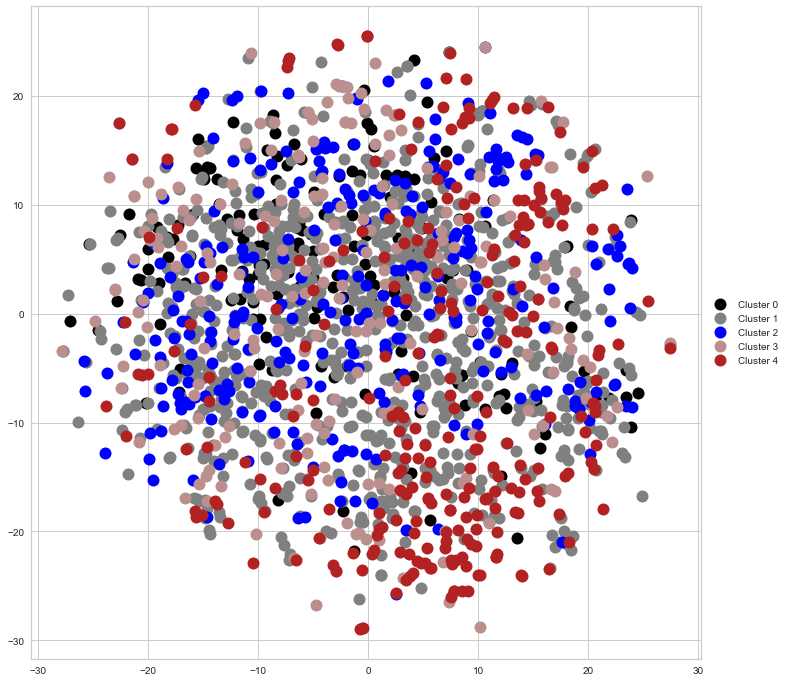

In [65]:
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters using a dict.  number of colors must correspond to K
cluster_colors = {0: 'black', 1: 'grey', 2: 'blue', 3: 'rosybrown', 4: 'firebrick'}

#set up cluster names using a dict.  
cluster_labels = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 
                  4: 'Cluster 4'}

#set up cluster names using a dict.  
#cluster_dict = cluster_title

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=range(0,len(clusters)))) 

#group by cluster
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(12, 12)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_labels[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='on')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='on')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #show legend with only 1 point
plt.savefig('countvec_tsne_docs.png', format = 'png')


## TF-IDF

In [66]:
#### Note: TSNE algorithm used for multidimensional scaling
mds = TSNE(n_components=2, metric="euclidean", random_state=random_seed)

# Note: The objective here is to obtain a picture of the documents in two dimensions
pos = mds.fit_transform(tfidf_matrix.toarray())  # shape (n_components, n_samples)

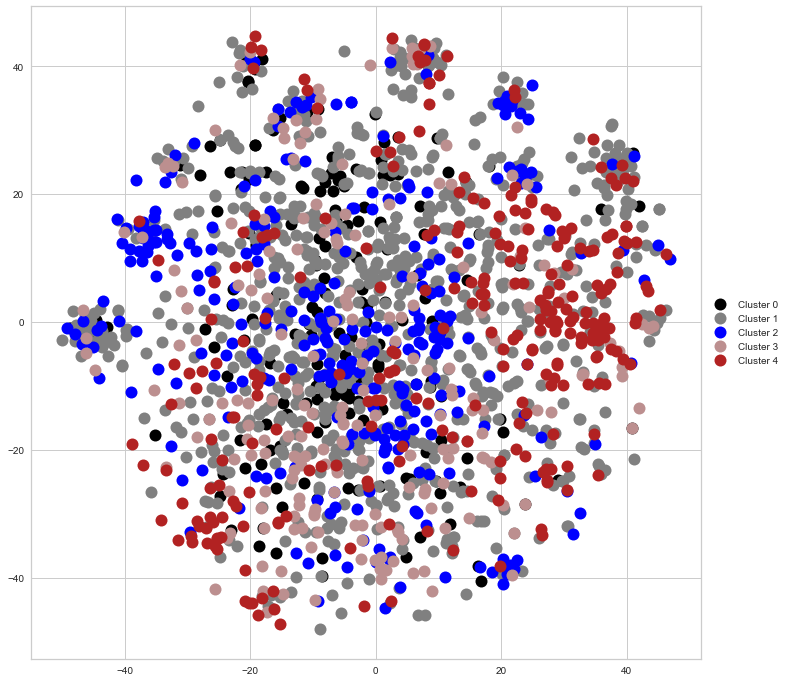

In [67]:
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters using a dict.  number of colors must correspond to K
cluster_colors = {0: 'black', 1: 'grey', 2: 'blue', 3: 'rosybrown', 4: 'firebrick'}

#set up cluster names using a dict.  
cluster_labels = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 
                  4: 'Cluster 4'}

#set up cluster names using a dict.  
#cluster_dict = cluster_title

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=range(0,len(clusters)))) 

#group by cluster
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(12, 12)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_labels[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='on')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='on')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #show legend with only 1 point
plt.savefig('tfidf_tsne_docs.png', format = 'png')

## Doc2Vec

In [68]:
#### Note: TSNE algorithm used for multidimensional scaling
mds = TSNE(n_components=2, metric="euclidean", random_state=random_seed)

# Note: The objective here is to obtain a picture of the documents in two dimensions
pos = mds.fit_transform(doc2vec_100_vectors)  # shape (n_components, n_samples)

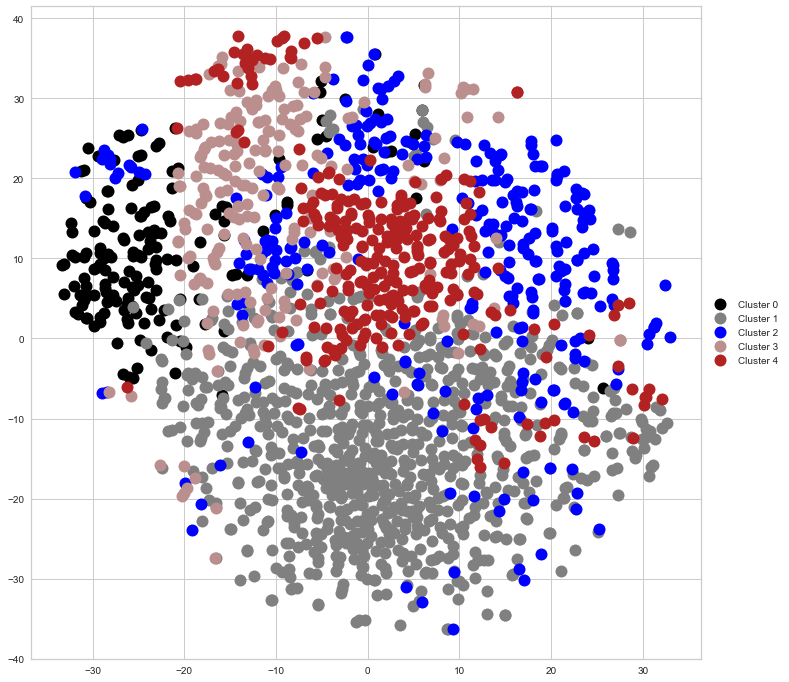

In [69]:
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters using a dict.  number of colors must correspond to K
cluster_colors = {0: 'black', 1: 'grey', 2: 'blue', 3: 'rosybrown', 4: 'firebrick'}

#set up cluster names using a dict.  
cluster_labels = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 
                  4: 'Cluster 4'}

#set up cluster names using a dict.  
#cluster_dict = cluster_title

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=range(0,len(clusters)))) 

#group by cluster
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(12, 12)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_labels[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='on')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='on')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #show legend with only 1 point

plt.savefig('docvec_tsne_docs.png', format = 'png')

In [70]:
for name,group in groups:
    print(name)
    print(group)

0
              x          y  label  title
4    -32.040260   6.567415      0      4
10   -28.442951   4.617137      0     10
14    -4.537439  25.278538      0     14
18   -25.617071  -4.922226      0     18
28   -25.554462  10.300432      0     28
...         ...        ...    ...    ...
1705 -25.565992  10.826344      0   1705
1709 -29.394529   8.880942      0   1709
1731 -19.047676   9.119526      0   1731
1734 -29.816072   1.555523      0   1734
1756 -24.951611  12.976873      0   1756

[170 rows x 4 columns]
1
              x          y  label  title
0     -4.544875 -11.521276      1      0
2     17.823954  -1.078184      1      2
3     13.790699  -5.400595      1      3
5      4.075322 -15.669098      1      5
7     15.207205  -0.349055      1      7
...         ...        ...    ...    ...
1794  -3.854974 -19.521862      1   1794
1795  17.225355 -20.533705      1   1795
1797  17.706646  -2.624554      1   1797
1798   6.841863 -13.819448      1   1798
1799 -18.211227 -12.376187   

In [71]:
len(clusters)

1800

# t-SNE on words

## CountVectorizer

In [72]:
#### Note: TSNE algorithm used for multidimensional scaling
mds = TSNE(n_components=2, metric="euclidean", random_state=random_seed)

# Note: The objective here is to obtain a picture of the documents in two dimensions
pos = mds.fit_transform(count_matrix.T.toarray())  # shape (n_components, n_samples)

In [73]:
# k=5
# km = KMeans(n_clusters=k, random_state =random_seed)
# km.fit(count_matrix.T)
# clusters = km.labels_.tolist()

In [74]:
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters using a dict.  number of colors must correspond to K
cluster_colors = {0: 'black', 1: 'grey', 2: 'blue', 3: 'rosybrown', 4: 'firebrick'}

#set up cluster names using a dict.  
cluster_labels = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 
                  4: 'Cluster 4'}

labels = np.array(count_vec.get_feature_names())

#set up cluster names using a dict.  
#cluster_dict = cluster_title

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=labels)) 

#group by cluster
groups = df.groupby('label')

df.groupby('label')

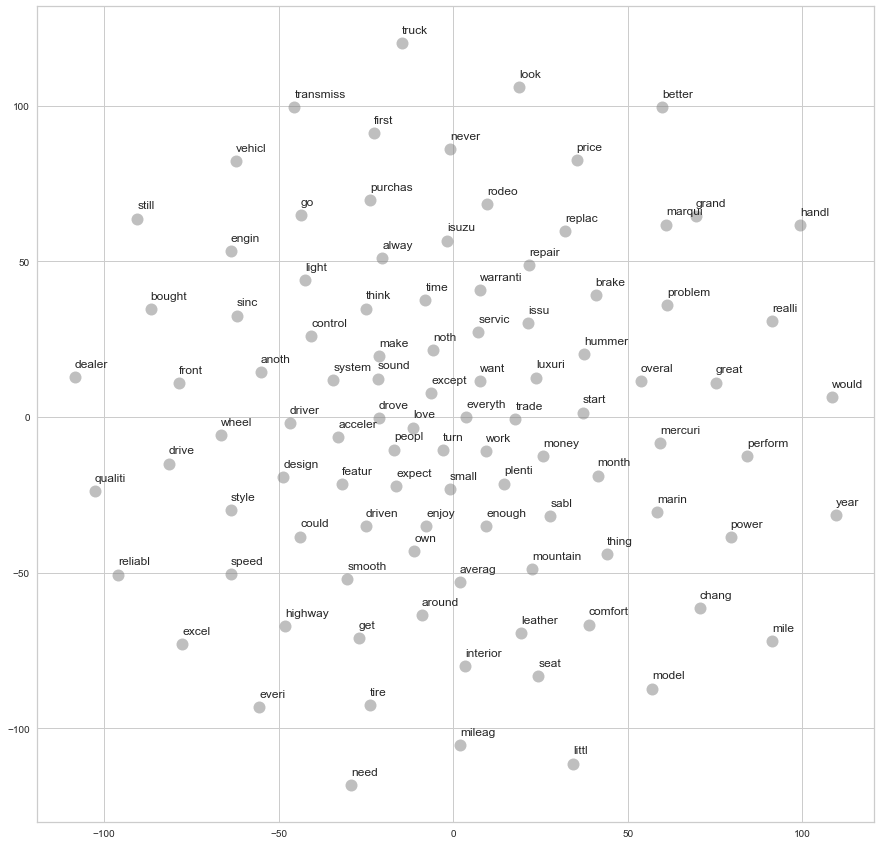

In [75]:
fig, ax = plt.subplots(figsize=(15, 15)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            #label=cluster_labels[name], color=cluster_colors[name], 
            mec='none',
            color = 'grey', alpha = 0.5)
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='on')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='on')

    ax.annotate(name, (group.x, group.y),
                textcoords="offset points",
                xytext=(0,10))

plt.savefig('countvec_mds_terms.png', format = 'png')

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #show legend with only 1 point

## TF-IDF

In [76]:
#### Note: TSNE algorithm used for multidimensional scaling
mds = TSNE(n_components=2, metric="euclidean", random_state=random_seed)

# Note: The objective here is to obtain a picture of the documents in two dimensions
pos = mds.fit_transform(tfidf_matrix.T.toarray())  # shape (n_components, n_samples)

In [77]:
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters using a dict.  number of colors must correspond to K
cluster_colors = {0: 'black', 1: 'grey', 2: 'blue', 3: 'rosybrown', 4: 'firebrick'}

#set up cluster names using a dict.  
cluster_labels = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 
                  4: 'Cluster 4'}

labels = np.array(tfidf_vec.get_feature_names())

#set up cluster names using a dict.  
#cluster_dict = cluster_title

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=labels)) 

#group by cluster
groups = df.groupby('label')

df.groupby('label')

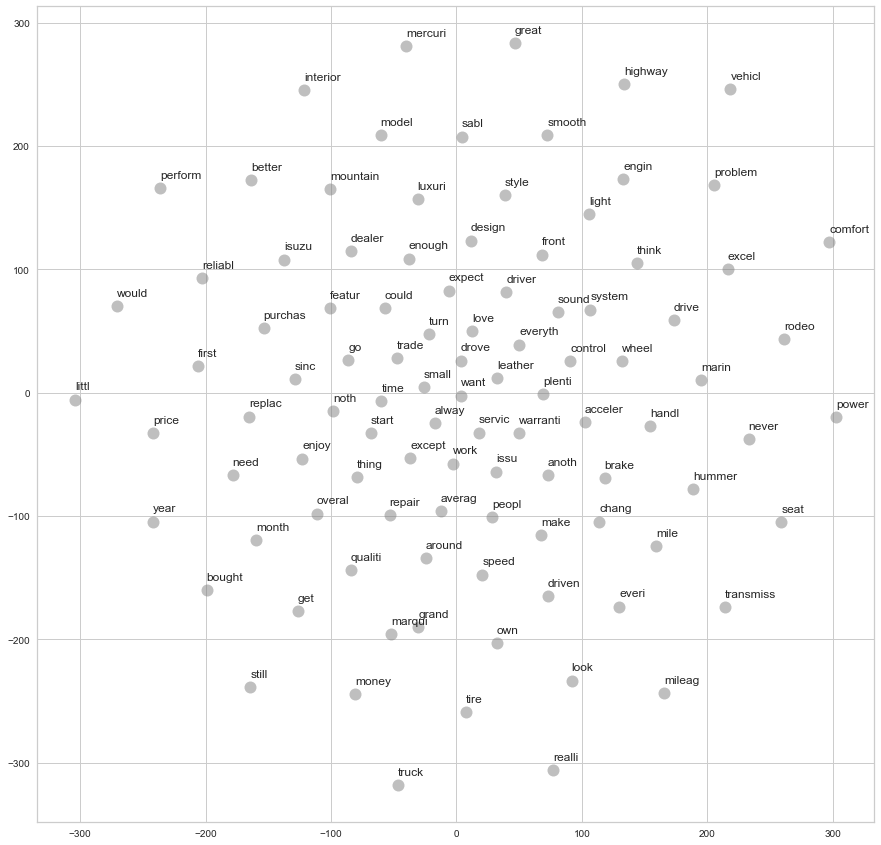

In [78]:
fig, ax = plt.subplots(figsize=(15, 15)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            #label=cluster_labels[name], color=cluster_colors[name], 
            mec='none',
            color='grey',
            alpha = 0.5)
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='on')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='on')

    ax.annotate(name, (group.x, group.y),
                textcoords="offset points",
                xytext=(0,10))
plt.savefig('tfidf_mds_terms.png', format = 'png')

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #show legend with only 1 point

## CountVectorizer

# Hierarchical Cluster Analysis

In [79]:
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.spatial.distance import pdist

dist = pdist(count_matrix.T.toarray())
linked = linkage(dist, method='ward')
fcluster = fcluster(linked, 0, criterion = 'distance')

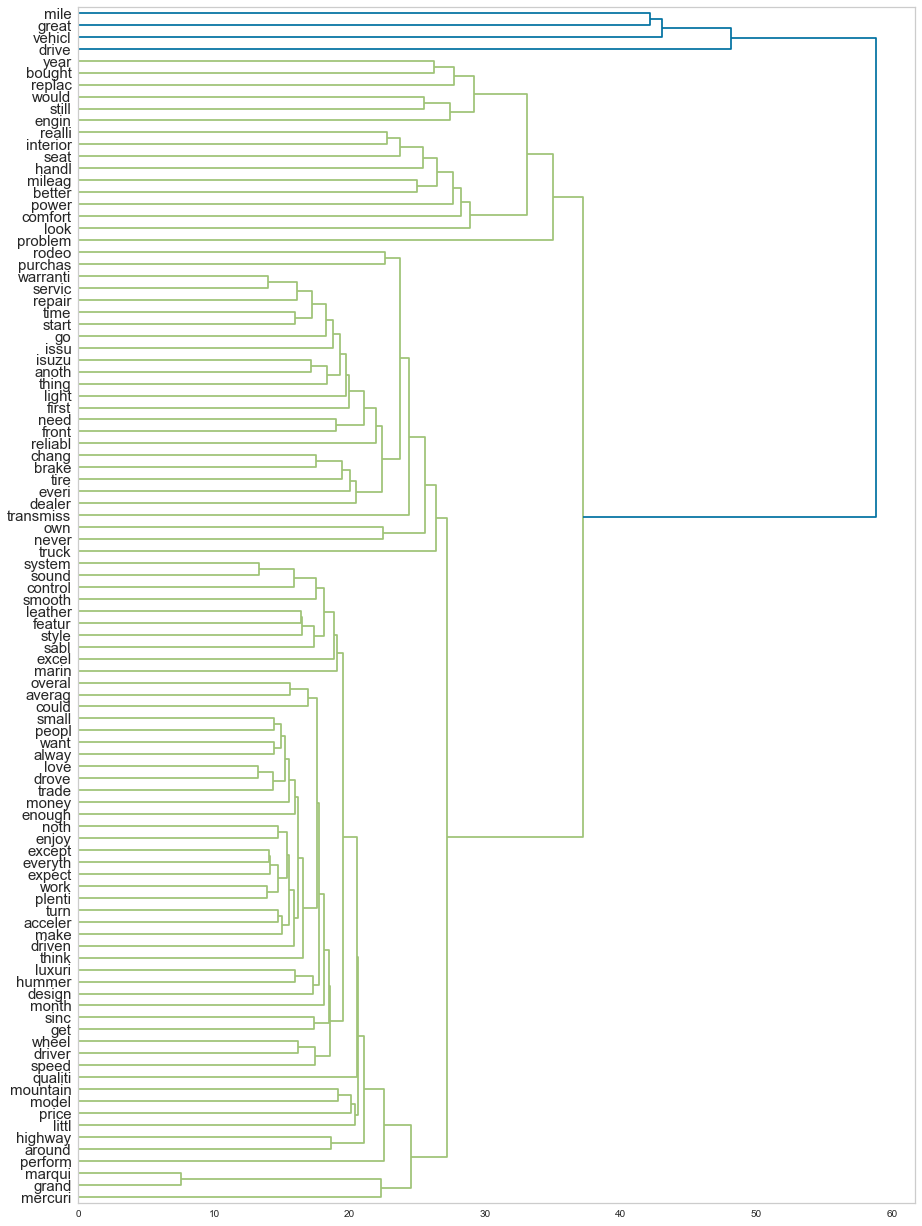

In [80]:
linked = linkage(count_matrix.T.toarray(), method='ward')

plt.subplots(figsize=(15, 22)) # set size
dendrogram(linked, 
            labels = count_vec.get_feature_names(),
            orientation='right')

plt.tick_params(axis='y', labelsize=15)
plt.grid(False)
plt.savefig('countvec_dendrogram.png', format = 'png')
plt.show()

## TF-IDF

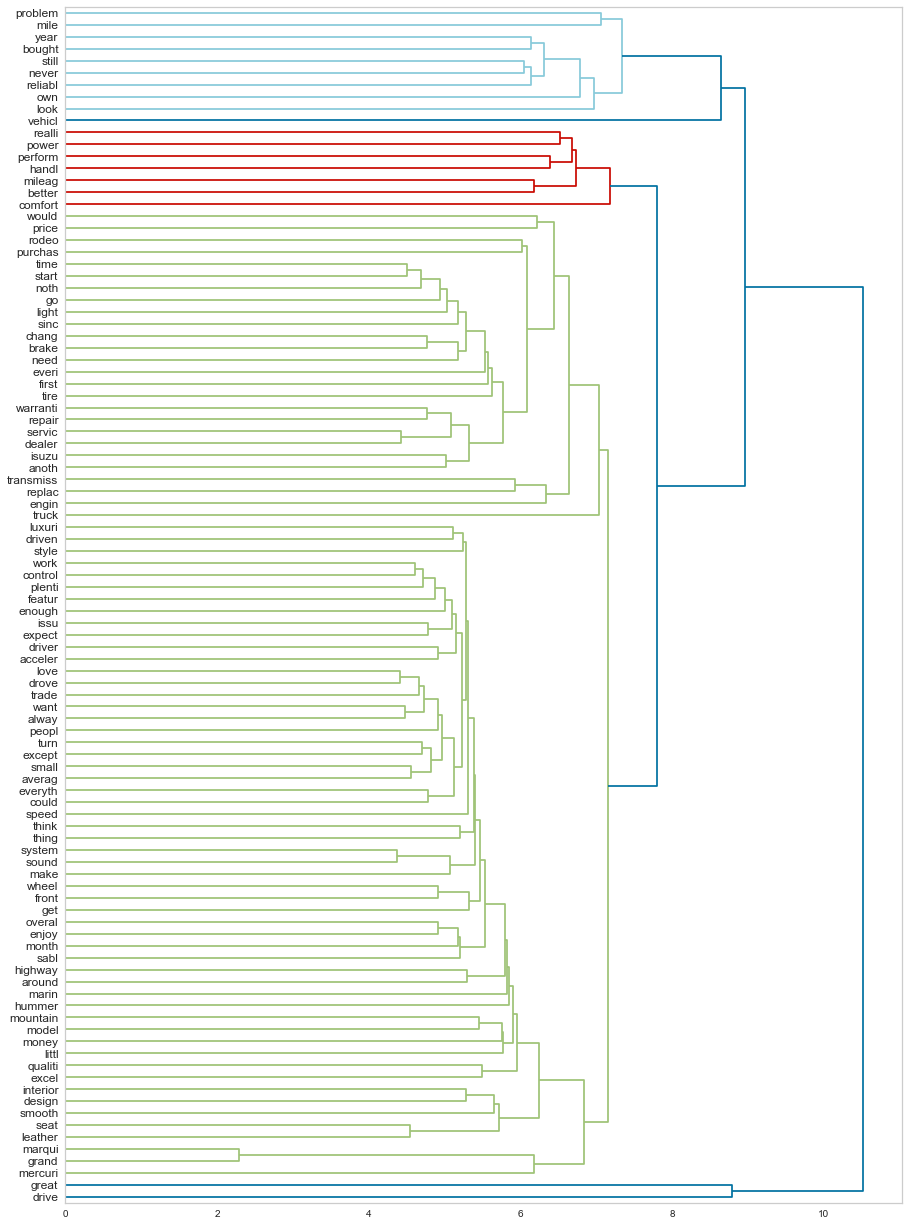

In [81]:
linked = linkage(tfidf_matrix.T.toarray(), method='ward')

plt.subplots(figsize=(15, 22)) # set size
dendrogram(linked,
            labels = tfidf_vec.get_feature_names(),
            orientation = 'right')
# plt.savefig('C:\\Users\\bxiao\Documents\\school_files\\453_nlp\\assignments\\453_assignment03\\tfidf_dendrogram01.png', 
#                 format = 'png', dpi = 1600)
plt.tick_params(axis='y', labelsize=12)
plt.grid(False)
plt.savefig('tfidf_dendrogram.png', format = 'png')
plt.show()
